In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

Pandas는 Numpy 기반의 DataFrame를 위해 설계되었음

1. 유연성 확대 (데이터 레이블 분류)
2. 요소 단위의 broadcasting에서 한계 (like grouping, pivot)

# Series: Indexed 1 dimension array in Pandas

In [ ]:
# Numpy보다 1 dimensiton array에 훨씬 효율적이다.
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [ ]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
data[1]

0.5

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data # Index를 자유롭게 변경하는 것도 가능하다

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
population_dict = {'California':3833, 'Texas':2644, 'NW':1965, 'Florida':1955, 'Illinois':1288}
population = pd.Series(population_dict)
population # dictionary를 Series 객체로 구성하는 것도 가능하다

California    3833
Texas         2644
NW            1965
Florida       1955
Illinois      1288
dtype: int64

In [ ]:
population['NW'] # dictionary처럼 key-value 접근도 가능

1965

construc Series's objection

In [ ]:
pd.Series(5, index = [1, 3, 5]) # repeated data can be Series

1    5
3    5
5    5
dtype: int64

In [ ]:
# 원하는 index의 값들만 출력할 수도 있다
pd.Series({2:'a', 1:'b', 3:'c'}, index = [3, 2])

3    c
2    a
dtype: object

Merging Series

In [ ]:
population_dict

{'California': 3833,
 'Texas': 2644,
 'NW': 1965,
 'Florida': 1955,
 'Illinois': 1288}

In [ ]:
area_dict = {'California' : 423, 'Texas':695, 'NW':141, 'Florida':170, 'Illinois':149}
area = pd.Series(area_dict)
area

California    423
Texas         695
NW            141
Florida       170
Illinois      149
dtype: int64

In [ ]:
# list Series to merge them
pd.DataFrame({'population':population, 'area':area})

,population,area
California,3833,423
Texas,2644,695
NW,1965,141
Florida,1955,170
Illinois,1288,149


# DataFrame used by Pandas

DataFrame(data=None, index=None, column=None, dtype=None)
1. data : ndarray
2. index
3. column : column names
4. dtype : bool, int, string, ..

In [ ]:
data = [{'a':i, 'b':2*i} for i in range(1,4)]
print(data)
pd.DataFrame(data)

[{'a': 1, 'b': 2}, {'a': 2, 'b': 4}, {'a': 3, 'b': 6}]


,a,b
0,1,2
1,2,4
2,3,6


In [ ]:
# 2 dimension array의 DataFrame 구상하기
pd.DataFrame(np.random.rand(3,2),
             columns=['foo', 'bar'], # column 값들 설정
             index = ['a', 'b', 'c'])

,foo,bar
a,0.544713,0.601558
b,0.841919,0.319017
c,0.999754,0.017509


In [ ]:
data = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
pd.DataFrame(data)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [ ]:
ind = pd.Index([2, 3, 4, 7, 10])
ind

Int64Index([2, 3, 4, 7, 10], dtype='int64')

In [ ]:
ind[::2] # 2개 간격으로

Int64Index([2, 4, 10], dtype='int64')

In [ ]:
print(ind.shape, ind.ndim, ind.dtype)

(5,) 1 int64


In [ ]:
# Index is invariable object in Pandas
ind[1] = 3

TypeError: ignored

Pandas는 조합의 연산(합,차,교)이 가능하도록 설계되었다.

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 10])

In [ ]:
indA & indB # 교집합 : &

In [ ]:
indA | indB # 합집합 : |

In [ ]:
indA ^ indB # 대칭 차 : (A u B) - (A n B)

# Data Indexing and selection

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [ ]:
#  method like dictionary can be used
print('b' in data)
print(data[:2])

True
a    0.25
b    0.50
dtype: float64


In [ ]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

Indexor : loc and iloc

In [ ]:
data

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns = ['A', 'B', 'C', 'D'])
df

In [ ]:
# loc(location) : 명시적 Index. 정확한 위치를 알 때 사용
print(data[1])

# iloc(interval location) : 암묵적 Index. integer(구간)을 이용
print(data[1:3])

# Python Rule : 명시적인 것이 암묵적인 것보다 낫다!
# interval이 겹치면 코드가 꼬이는 경우가 발생할 수 있다.

In [1]:
area = pd.Series({'California':423967, 'Texas':695662,
                  'Florida':170312, 'NY':141297})
pop = pd.Series({'California':39538223, 'Texas':29145505,
                  'Florida':21538187, 'NY':119280})
pd.DataFrame({'area':area, 'pop':pop}) # {name of column : Series}

NameError: ignored

In [ ]:
print(data['area']) # way to print column
print(data.area)

California    423967
Texas         695662
Florida       170312
NY            141297
Name: area, dtype: int64
California    423967
Texas         695662
Florida       170312
NY            141297
Name: area, dtype: int64


DataFrame : array in 2 dimension

In [ ]:
data.T # 전치행렬

,California,Texas,Florida,NY
area,423967,695662,170312,141297
pop,39538223,29145505,21538187,119280


In [ ]:
data

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
NY,141297,119280


In [ ]:
# iloc(암묵적) Index를 사용해 원하는 값만 추출
data.iloc[:3, :1]

,area
California,423967
Texas,695662
Florida,170312


# Pandas에서 데이터 연산하기

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1,7,5,1
1,4,0,9,5
2,8,0,9,2


In [ ]:
np.exp(ser) # e^() 꼴로 변환해줌

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,7.071068e-01,-0.707107,-0.707107,0.707107
1,1.224647e-16,0.000000,0.707107,-0.707107
2,-2.449294e-16,0.000000,0.707107,1.000000


# Ufunc : Index sort
- If apply bin calculation to 2 Series or objection of DataFrame, Pandas sort them during calculation based on index

In [ ]:
area = pd.Series({'Alaska':1723337, 'Texas':695662, 'California':423967}, name='area')
population = pd.Series({'California':28332521, 'Texas':26448193,
                        'NY':19651127}, name='population')

# Index 기반 정렬 -> NY은 연산 불가 (NaN)
population / area

Alaska              NaN
California    66.827185
NY                  NaN
Texas         38.018740
dtype: float64

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
A

NameError: ignored

In [ ]:
B = pd.DataFrame(rng.randint(0, 20, (3, 3)), columns=list('BAC'))
B

In [ ]:
A + B # Index 위치가 다르더라도, 정렬됨

Pandas method 정리
1. add : add()
2. sub : sub(), subtrack()
3. mul : mul(), multiply()
4. div : truediv(), div(), divide()
5. div(//) : floordiv()
6. remainder(%) : mod()
7. mul^(**) : pow()

# Ufunc : calculation between DataFrame and Series

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
print(x[0], x[1])

0 1


In [ ]:
# Pandas is Nullable datatype
data = pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')
data

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

In [ ]:
data.isnull() # Define whether data is zero

0    False
1     True
2    False
3     True
4     True
dtype: bool

In [ ]:
data.notnull

<bound method Series.notnull of 0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32>

In [ ]:
# Remove Null data
data.dropna()

0    1
2    2
dtype: Int32

In [ ]:
df = pd.DataFrame([[1,     np.nan, 2],
                   [2,     3,      5],
                   [np.nan,4      ,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# In DataFrame, all Null column is removed
df.dropna()

,0,1,2
1,2.0,3.0,5


In [ ]:
df[2] # based on row

0    2
1    5
2    6
Name: 2, dtype: int64

In [ ]:
df.fillna(0) # fill NA

,0,1,2
0,1.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


In [ ]:
df.fillna(10)


,0,1,2
0,1.0,10.0,2
1,2.0,3.0,5
2,10.0,4.0,6


Multi-Index in DataFrame

In [ ]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# unstack() : Transform Series's index into normal index
pop_df = df.unstack() # dimension : column->row
pop_df

0  0    1.0
   1    2.0
   2    NaN
1  0    NaN
   1    3.0
   2    4.0
2  0    2.0
   1    5.0
   2    6.0
dtype: float64

In [ ]:
df2 = pd.DataFrame(np.arange(16).reshape(4,4),
                index = [[1,1,2,2],['s1','s2','s1','s2']],
                columns = [['apple','apple','banana','banana'], ['price','qty','price','qty']],
)

df2

apple     banana    
     price qty  price qty
1 s1     0   1      2   3
  s2     4   5      6   7
2 s1     8   9     10  11
  s2    12  13     14  15

In [ ]:
df2['apple']

price  qty
1 s1      0    1
  s2      4    5
2 s1      8    9
  s2     12   13

In [ ]:
df2['apple', 'price']

1  s1     0
   s2     4
2  s1     8
   s2    12
Name: (apple, price), dtype: int64

# Merege Dataset : Merege & Join

In [ ]:
df1 = pd.DataFrame({'employee':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group':['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee':['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_data':[2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_data
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
# co-related column('employee') is necessary
pd.merge(df1, df2)

,employee,group,hire_data
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
df3 = pd.DataFrame({'name':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary':[70000, 80000, 120000, 90000]})
print(df1); print(df3)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [ ]:
# PanDas merge는 left/right_on을 통해서 column 순서 지정 가능하다.
# 참고 : https://pandas.pydata.org/docs/reference/api/pandas.merge.html
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


NumPY에 Array를 연결하기 위해 concatenate가 있다면, PanDas에는 pd.concat()가 있다.

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
df1 = pd.DataFrame({'name':['Peter', 'Paul', 'Mary'],
                    'food':['fish', 'beans', 'bread']},
                   columns = ['name', 'food'])
df2 = pd.DataFrame({'name':['Mary', 'Joseph'],
                    'drinks':['wine', 'beer']},
                   columns=['name', 'drink'])
print(df1); print(df2);

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary   NaN
1  Joseph   NaN


In [ ]:
1# Merge-join can specify 'Inner/Outer' Join
# Basically, Inner Join (교집합)
pd.merge(df1, df2)

,name,food,drink
0,Mary,bread,NaN


In [ ]:
# Outer join : 합집합 with NA
pd.merge(df1, df2, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,NaN
3,Joseph,NaN,NaN


Suffixes : When row name is repeated

GroupBy : Devide, Apply and Combine

In [ ]:
df = pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C'],
                   'data':range(6)}, columns = ['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
# key 값을 기준으로 groupby후 sum 연산 수행
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


# Pandas merge practice : State population's density

In [ ]:
pop = pd.read_csv('/content/drive/MyDrive/Colab_Note/Python Data-Science HandBook/csv/state-population.csv')
areas = pd.read_csv('/content/drive/MyDrive/Colab_Note/Python Data-Science HandBook/csv/state-areas.csv')
abbrevs = pd.read_csv('/content/drive/MyDrive/Colab_Note/Python Data-Science HandBook/csv/state-abbrevs.csv')
# abbrevs : 약자(not weak)
print(pop.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0


In [ ]:
print(areas.head())

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


In [ ]:
print(abbrevs.head())

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

- Basic setting is followed by '='
- Parameters list
1. left/right : DataFrame or named Series
2. how : left, right, outer, inner, cross
3. on : label or list
4. left/right_on : Columns or row placed in named index. (same as column's role)
5. sort : if data is bool, it can be sorted
6. suffixes : axis for DataFrame. At leat one is non-zero
7. copy : if False, copying is unavailable

In [ ]:
# Outer-join does not remove correcspond(repeated) data
# pop(population), abbrevs(주 약자명) is merged
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # remove repeated info.
merged.head()

<ipython-input-46-20f77e995f1c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged = merged.drop('abbreviation', 1) # remove repeated info.


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [ ]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [ ]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


2000년 이전에는 NA data 발생 : 원본 데이터에 없기 때문에

In [ ]:
# loc는 명시적 Index 찾음
# isnull()을 통해서 "'state/region' is NA" 연산 수행
# unique() : 고유한(unique) value만 추출함 = 중복되지 않는 값만
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto RIco'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head

<bound method NDFrame.head of      state/region     ages  year   population          state  area (sq. mi)
0              AL  under18  2012    1117489.0        Alabama        52423.0
1              AL    total  2012    4817528.0        Alabama        52423.0
2              AL  under18  2010    1130966.0        Alabama        52423.0
3              AL    total  2010    4785570.0        Alabama        52423.0
4              AL  under18  2011    1125763.0        Alabama        52423.0
...           ...      ...   ...          ...            ...            ...
2539          USA    total  2010  309326295.0  United States            NaN
2540          USA  under18  2011   73902222.0  United States            NaN
2541          USA    total  2011  311582564.0  United States            NaN
2542          USA  under18  2012   73708179.0  United States            NaN
2543          USA    total  2012  313873685.0  United States            NaN

[2544 rows x 6 columns]>

In [ ]:
final.isnull().any()
# NA exists in pop, area

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [ ]:
final['state'][final['area (sq. mi)'].isnull()].unique()
# NA area 찾기

array(['Puerto RIco', 'United States'], dtype=object)

In [ ]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [ ]:
data2010.set_index('state', inplace=True)

KeyError: ignored

In [ ]:
density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending=False, inplace=True) # 내림차순 정렬
density.head() # 일구 밀도 기준으로 정렬

state/region
DC    8898.897059
NJ    1009.253268
RI     681.339159
CT     645.600649
MA     621.815538
dtype: float64

In [ ]:
density.tail # tail까지 출력

<bound method NDFrame.tail of state/region
DC    8898.897059
NJ    1009.253268
RI     681.339159
CT     645.600649
MA     621.815538
MD     466.445797
DE     460.445752
NY     356.094135
FL     286.597129
PA     275.966651
OH     257.549634
CA     228.051342
IL     221.687472
VA     187.622273
IN     178.197831
NC     177.617157
GA     163.409902
TN     150.825298
SC     144.854594
NH     140.799273
HI     124.746707
KY     107.586994
MI     102.015794
WA      94.557817
TX      93.987655
AL      91.287603
LA      87.676099
WI      86.851900
MO      86.015622
WV      76.519582
VT      65.085075
MS      61.321530
MN      61.078373
AZ      56.214497
AR      54.948667
IA      54.202751
OK      53.778278
CO      48.493718
OR      39.001565
ME      37.509990
KS      34.745266
UT      32.677188
NV      24.448796
NE      23.654153
ID      18.794338
NM      16.982737
SD      10.583512
ND       9.537565
MT       6.736171
WY       5.768079
AK       1.087509
dtype: float64>

The basic of large-data analyis is Effiecnt summary
- for this, aggregate operations is required.
- aggregate operation(집계 함수) : sum(), mean(), median(), min()

# DataFrame practice 2 : planet

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head() # Velocity : 속도(v)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [ ]:
print(ser.sum()); print(ser.mean())

2.811925491708157
0.5623850983416314


In [ ]:
df = pd.DataFrame({'A':rng.rand(5),
                   'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [ ]:
# column을 axis로 잡았을 때 mean value
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

DataFrame.describe() : represent aggregate operations
- include, exclude options are available
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


GroupBy : split, apply(적용), combine

In [ ]:
df = pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C'],
                  'data':range(6)}, columns = ['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
# 'key'를 기준으로 GrupBy했으므로 Index는 'key'가 됨
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [ ]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


median:중간값 / mean:평균값

In [ ]:
planets.groupby('method').mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [ ]:
# distance의 mean value 찾기
planets.groupby('method')['distance'].mean()

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

In [ ]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


DataFrame에서 aggregate() vs describe()
- aggregate : 사용자가 지정한 집계 합수를 얻는다. 각 열에 다른 집계 합수를 적용할 수도 있어서 열 별로 다양한 결과를 얻을 수 있다.
-  describe : DataFrame의 기술 통계(descriptive statistics)를 제공하여 통계적 정보들을 요약 제공한다. 요약 통계 정보가 필요할 때 유용함ㅇ

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [ ]:
df.groupby('key').aggregate({'data1':'min', 'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


Filltering function helps filtering data based on group.

In [ ]:
def filter_func() :
  return x['data2'].std() > 4 # std() : 표준 편차

In [ ]:
print(df); print(df.groupby('key').std())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


p.193 ~ 194 : filtering, converting

# Pivot table : large dimension version of GroupBy

In [ ]:
# 타이타닉에 탑승했던 승객들의 정보
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


좌석의 등급에 따라서 생존 확률의 평균값 분류 : groupby vs pivot_table

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


같은 결과를 보여주지만, pivot_table이 훨씬 가시성이 좋다!

In [ ]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', 'age'], ['fare', 'class'])

fare         0.0000         4.0125   5.0000   6.2375   6.4375   6.4500    \
class           First Third    Third    First    Third    Third    Third   
sex    age                                                                 
female 0.75       NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       1.00       NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       2.00       NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       3.00       NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       4.00       NaN   NaN      NaN      NaN      NaN      NaN      NaN   
...               ...   ...      ...      ...      ...      ...      ...   
male   70.00      NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       70.50      NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       71.00      NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       74.00      NaN   NaN      NaN      NaN      NaN      NaN      NaN   
       80.00      NaN   NaN      NaN      NaN      NaN      NaN      NaN   

fare         6.4958   6.7500   6.9750    ... 151.5500 153.4625 164.8667  \
class           Third    Third    Third  ...    First    First    First   
sex    age                               ...                              
female 0.75       NaN      NaN      NaN  ...      NaN      NaN      NaN   
       1.00       NaN      NaN      NaN  ...      NaN      NaN      NaN   
       2.00       NaN      NaN      NaN  ...      0.0      NaN      NaN   
       3.00       NaN      NaN      NaN  ...      NaN      NaN      NaN   
       4.00       NaN      NaN      NaN  ...      NaN      NaN      NaN   
...               ...      ...      ...  ...      ...      ...      ...   
male   70.00      NaN      NaN      NaN  ...      NaN      NaN      NaN   
       70.50      NaN      NaN      NaN  ...      NaN      NaN      NaN   
       71.00      NaN      NaN      NaN  ...      NaN      NaN      NaN   
       74.00      NaN      NaN      NaN  ...      NaN      NaN      NaN   
       80.00      NaN      NaN      NaN  ...      NaN      NaN      NaN   

fare         211.3375 211.5000 227.5250 247.5208 262.3750 263.0000 512.3292  
class           First    First    First    First    First    First    First  
sex    age                                                                   
female 0.75       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       1.00       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       2.00       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       3.00       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       4.00       NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...               ...      ...      ...      ...      ...      ...      ...  
male   70.00      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       70.50      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       71.00      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       74.00      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
       80.00      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[145 rows x 226 columns]

Aggfunc의 기본은 mean이고, 다양한 집계 함수가 이용될 수 있음

# Practice : birth rate data

In [ ]:
births = pd.read_csv('/content/drive/MyDrive/Colab_Note/Python Data-Science HandBook/csv/births.csv')

In [ ]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
# decade(10 years)를 기준으로 Index 재설정
births['decade'] = 10 * (births['year'] // 10)

# set pivot_table : sum func
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total biths per year')

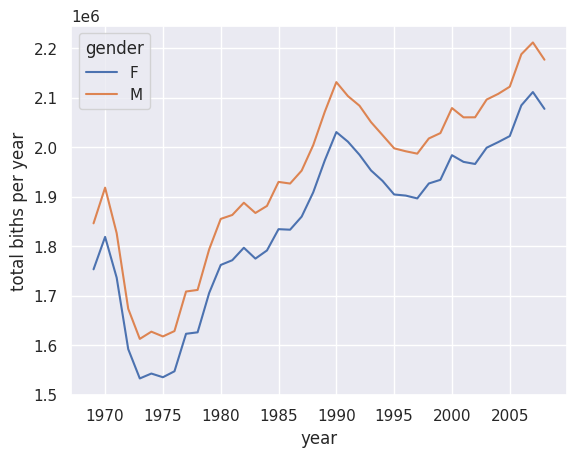

In [ ]:
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total biths per year') # set y-axis label

그래프 해석 : M > F always

In [ ]:
# np.percentile : data의 백분위 상 위치 표현 (50=mean)
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [ ]:
# 0, 25, 50, 75, 100 중에서 3개 구간의 위치가 어디인가
quartiles

array([4358. , 4814. , 5289.5])

Pandas를 이용해 Data를 추출하기 위해서는 정제하는 작업이 우선 요구됨
- reduce error-data
- error-data example : data is 2021-14-35
- This process is named Clipping
- 대표적인 Clipping 기법은 정규분포 외곽의 data를 제거하는 것

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [ ]:
# Day column 을 int로 설정
births['day'] = births['day'].astype(int)

<ipython-input-22-502977fed258>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [ ]:
# Year, month, day를 통해서 datetime Index 설정
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day,
                              format="%Y%m%d")
births['dayofweek'] = births.index.dayofweek

<ipython-input-29-7f2442e86f49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


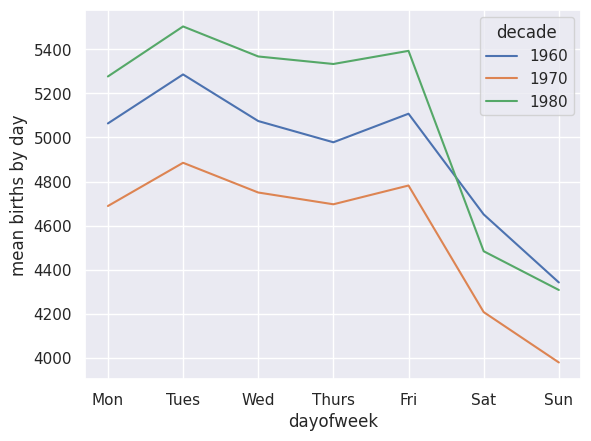

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7),
              xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

자료 분석 : birth는 연대에 상관없이 주중이 주말에 비해 치우쳐져 있음

In [ ]:
# Month-day만을 기준으로 births를 추정
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head

<bound method NDFrame.head of          births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]>

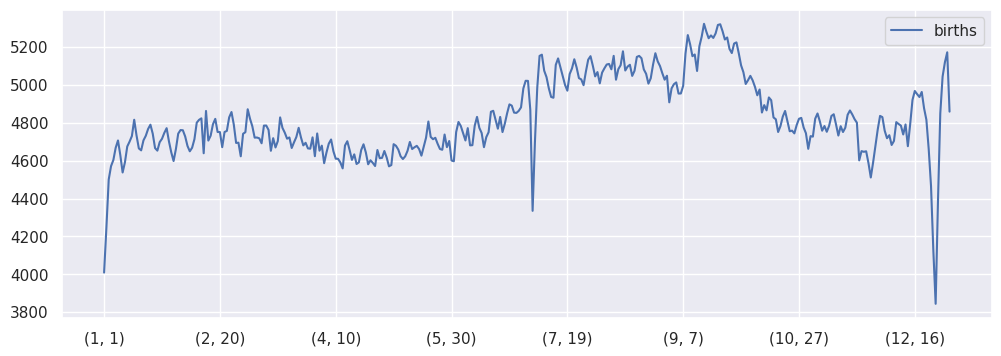

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);

# Vector based string computation

If data can be vector-form, normalization will be easy

In [ ]:
# Capitalize() : first_letter-upper(), else-lower()
data = ['PETER', 'PAUL', 'Mary', 'GUIdo']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [ ]:
names = pd.Series(data)
names

0    PETER
1     PAUL
2     Mary
3    GUIdo
dtype: object

In [ ]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

문자열에 대한 함수의 결과는 bool, int, string 등등 매우 다양하다!
- startswith(), len(), lower(), split()
- 이를 적당하게 사용하면, 활용성은 무궁무진할 것

In [ ]:
# str.extract() : 정규 표현식을 통해서 특정 문자열을 추출
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael
